In [2]:
from array import array
import math
import numpy as np

In [3]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [4]:
m = 1 #Set the order of the polynomial
n = 15 #Set the number of data points
jitter = array('d')
jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]

In [5]:
x = array('d')
y = array('d')

In [6]:
par = array('d')
par.append(1.80)
par.append(4.05)

for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+jitter[i])

In [7]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [8]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

A matrix = 
[[15.         -4.        ]
 [-4.         80.71111111]]
V matrix = 
[[ 10.8 ]
 [324.48]]
A_inverse = 
[[0.06755952 0.00334821]
 [0.00334821 0.0125558 ]]
Diagonal Check:
[[ 1.00000000e+00  0.00000000e+00]
 [-2.75793497e-17  1.00000000e+00]]
Coefficients:
[[1.81607143]
 [4.11026786]]


In [9]:
yfit = 0
chi2 = 0
for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow((yfit-y[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m-1)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

i = 0  y = -16.400000  yfit = -14.625000
i = 1  y = -10.240000  yfit = -12.432857
i = 2  y = -11.080000  yfit = -10.240714
i = 3  y = -6.920000  yfit = -8.048571
i = 4  y = -5.760000  yfit = -5.856429
i = 5  y = -5.600000  yfit = -3.664286
i = 6  y = 0.560000  yfit = -1.472143
i = 7  y = -0.280000  yfit = 0.720000
i = 8  y = 3.880000  yfit = 2.912143
i = 9  y = 5.040000  yfit = 5.104286
i = 10  y = 5.200000  yfit = 7.296429
i = 11  y = 11.360000  yfit = 9.488571
i = 12  y = 10.520000  yfit = 11.680714
i = 13  y = 14.680000  yfit = 13.872857
i = 14  y = 15.840000  yfit = 16.065000
chi2/dof = 29.710714 / 13.000000


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84364/353095447.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_84364/353095447.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = chi2 + math.pow((yfit-y[i]),2)


In [10]:
for k in range(0,m+1):
    print("k = %d, err = %f" % (k,math.pow(ainv[k][k]*chi2perdof,0.5)))

k = 0, err = 0.392942
k = 1, err = 0.169398


Fit params:  [4.11026786 1.81607144]
Covariance Matrix:  [[0.02869553 0.00765214]
 [0.00765214 0.1544032 ]]
Errors in Fit params:  [0.16939755 0.39294173]
Fit 1: 29.71071428571429 13



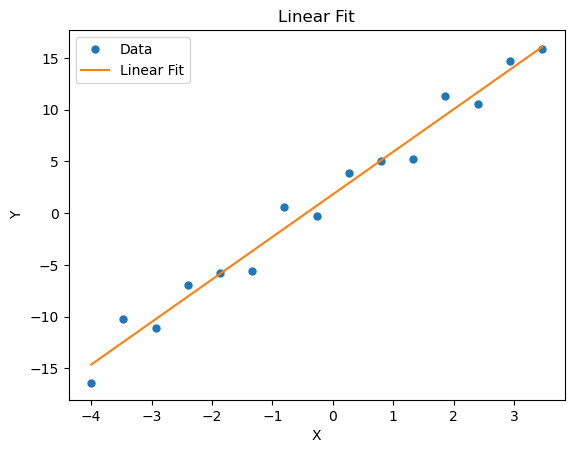

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)

fig, ax = plt.subplots()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linear Fit')

# Perform linear fit using curve_fit
def linear_func(x, a, b):
    return a * x + b

fit_params, covariance_matrix = curve_fit(linear_func, x, y)
fit_line = linear_func(x, *fit_params)
error_fit_params = np.sqrt(np.diag(covariance_matrix))

print("Fit params: ",fit_params)
print("Covariance Matrix: ",covariance_matrix)
print("Errors in Fit params: ",error_fit_params)

# Calculate chi-squared
residuals = y - fit_line
chi2 = np.sum(residuals ** 2)
ndf = n - len(fit_params)
chi2_ndf = chi2 / ndf
print(f"Fit 1: {chi2} {ndf}\n")

ax.plot(x, y, 'o', markersize=5, label='Data')
ax.plot(x, fit_line, '-', label='Linear Fit')
ax.legend()

plt.show()
